In [2]:
import pandas as pd
df = pd.read_csv('netflix_titles.csv')

In [3]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(palette='deep')

import numpy as np

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
import warnings
warnings.filterwarnings('ignore')
import geopandas as gpd
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
df1=df.copy()

In [10]:
# Convert date column to datetime, coerce errors
df1['date'] = pd.to_datetime(df1['date_added'], errors='coerce')

# Filter out rows with NaT values
df1 = df1.dropna(subset=['date'])

# Creating a numerical column for the week added
df1['week'] = df1['date'].dt.isocalendar().week

# Print the DataFrame to verify the changes
df1.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date,week
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,38
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,38
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,38
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24,38
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24,38


In [17]:

# Define the convert_to_seconds function
def convert_to_seconds(duration):
    if pd.isna(duration):
        return 0  # Return 0 for NaN values
    if 'min' in duration:
        return int(duration.split()[0]) * 60  # Convert minutes to seconds
    elif 'season' in duration:
        # Assuming 1 season equals 10 episodes and each episode is 30 minutes
        return int(duration.split()[0]) * 10 * 30 * 60  # Convert seasons to seconds
    elif 's' in duration:
        return int(duration.split()[0])  # Already in seconds
    else:
        return 0  # Return 0 for unknown formats

# Apply the convert_to_seconds function to the duration column
df1['duration_seconds'] = df1['duration'].apply(convert_to_seconds)

# Print the first few rows to verify the changes
df1.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date,week,duration_seconds
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,38,5400
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,38,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,38,1
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24,38,1
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24,38,2


In [18]:

# Function to map values in the "listed_in" column to film titles
def map_film_title(listed_in):
    if "drama, international movie" in listed_in.lower():
        return "Challengers"
    elif "documentary" in listed_in.lower():
        return "What Jennifer Did"
    elif "stand-up comedy" in listed_in.lower():
        return "Wanda Sykes"
    elif "comedies" in listed_in.lower() and "dramas" in listed_in.lower() and "international movies" in listed_in.lower():
        return "The Visitors"
    elif "dramas" in listed_in.lower() and "independent movies" in listed_in.lower() and "international movies" in listed_in.lower():
        return "Castaway on the Moon"
    else:
        return "Other"

# Create the "film_title" column based on the mapping function
df1['film_title'] = df1['listed_in'].apply(map_film_title)



                                            listed_in            film_title
0                                       Documentaries                 Other
1     International TV Shows, TV Dramas, TV Mysteries                 Other
2   Crime TV Shows, International TV Shows, TV Act...                 Other
3                              Docuseries, Reality TV                 Other
4   International TV Shows, Romantic TV Shows, TV ...                 Other
5                  TV Dramas, TV Horror, TV Mysteries                 Other
6                            Children & Family Movies                 Other
7    Dramas, Independent Movies, International Movies  Castaway on the Moon
8                        British TV Shows, Reality TV                 Other
9                                    Comedies, Dramas                 Other
10  Crime TV Shows, Docuseries, International TV S...                 Other
11  Crime TV Shows, International TV Shows, TV Act...                 Other
12          

In [20]:
df1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date,week,duration_seconds,film_title
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,38,5400,Other
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,38,2,Other
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,38,1,Other
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24,38,1,Other
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24,38,2,Other


In [21]:

import numpy as np

# Create df2 with random gender and age columns
np.random.seed(0)  # For reproducibility

# Generate random gender values
genders = ['Male', 'Female']
df2 = pd.DataFrame({
    'gender': np.random.choice(genders, size=len(df1)),
    'age': np.random.randint(18, 65, size=len(df1))  # Random age between 18 and 65
})

# Merge df1 and df2
merged_df = pd.concat([df1, df2], axis=1)

# Print the merged DataFrame
merged_df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date,week,duration_seconds,film_title,gender,age
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,38,5400.0,Other,Male,47.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,38,2.0,Other,Female,34.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,38,1.0,Other,Female,38.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021.0,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24,38,1.0,Other,Male,26.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021.0,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24,38,2.0,Other,Female,54.0


In [42]:
# Group by week and count the number of unique show_ids for each week
weekly_show_ids = merged_df.groupby('week')['show_id'].nunique()

# Print the result
print(weekly_show_ids)


week
1     368
2     104
3     112
4      87
5     203
6      97
7     147
8     109
9     253
10    135
11    161
12    107
13    247
14    172
15    150
16    158
17    154
18    233
19    116
20    129
21    115
22    202
23    151
24    164
25    143
26    264
27    239
28    129
29    138
30    159
31    264
32    122
33    152
34    142
35    262
36    141
37    181
38    138
39    166
40    284
41    115
42    135
43    116
44    310
45     97
46    134
47    120
48    195
49    139
50    184
51    134
52    130
53    102
Name: show_id, dtype: int64


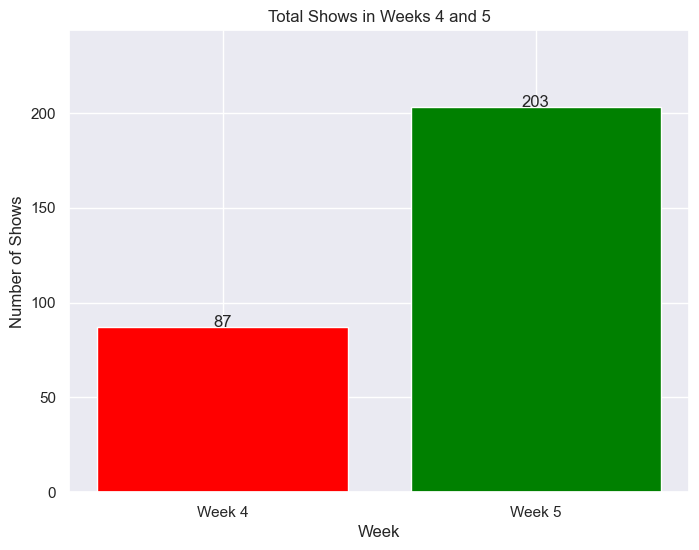

In [48]:
import matplotlib.pyplot as plt

# Filter the DataFrame for weeks 4 and 5
week_4_shows = merged_df[merged_df['week'] == 4]
week_5_shows = merged_df[merged_df['week'] == 5]

# Count the number of shows in each week
total_week_4 = week_4_shows['show_id'].nunique()
total_week_5 = week_5_shows['show_id'].nunique()

# Plot the data
plt.figure(figsize=(8, 6))
plt.bar(['Week 4', 'Week 5'], [total_week_4, total_week_5], color=['red', 'green'])

# Add exact numbers above the bars
for i, count in enumerate([total_week_4, total_week_5]):
    plt.text(i, count + 0.1, str(count), ha='center')

plt.title('Total Shows in Weeks 4 and 5')
plt.xlabel('Week')
plt.ylabel('Number of Shows')
plt.ylim(0, max(total_week_4, total_week_5) * 1.2)  # Adjust y-axis limits for better visualization
plt.show()


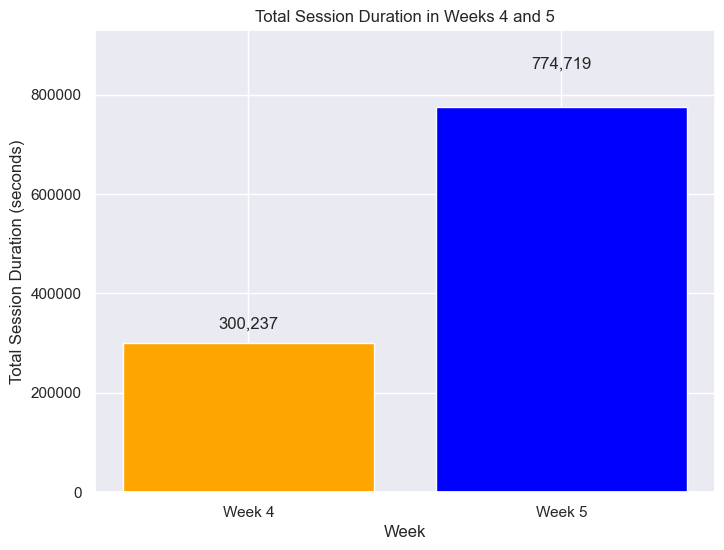

In [35]:

# Filter the DataFrame for weeks 4 and 5
week_4_data = df1[df1['week'] == 4]
week_5_data = df1[df1['week'] == 5]

# Calculate the total session duration for each week
total_duration_week_4 = week_4_data['duration_seconds'].sum()
total_duration_week_5 = week_5_data['duration_seconds'].sum()

# Plotting the data
plt.figure(figsize=(8, 6))
plt.bar(['Week 4', 'Week 5'], [total_duration_week_4, total_duration_week_5], color=['orange', 'blue'])

# Adding exact numbers above the bars
for i, duration in enumerate([total_duration_week_4, total_duration_week_5]):
    plt.text(i, duration + 0.1 * duration, f'{duration:,}', ha='center')

plt.title('Total Session Duration in Weeks 4 and 5')
plt.xlabel('Week')
plt.ylabel('Total Session Duration (seconds)')
plt.ylim(0, max(total_duration_week_4, total_duration_week_5) * 1.2)  # Adjust y-axis limits for better visualization
plt.show()


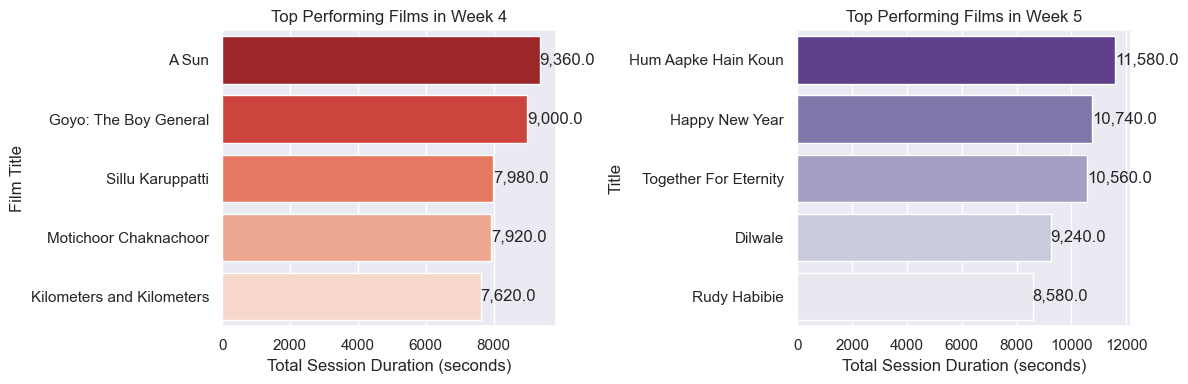

In [64]:

import seaborn as sns

# Filter the DataFrame for weeks 4 and 5
week_4_data = merged_df[merged_df['week'] == 4]
week_5_data = merged_df[merged_df['week'] == 5]

# Group by film title and sum the durations to get total session duration for each film for week 4 and week 5
total_session_duration_week_4 = week_4_data.groupby('title')['duration_seconds'].sum().reset_index()
total_session_duration_week_5 = week_5_data.groupby('title')['duration_seconds'].sum().reset_index()

# Exclude the category "Others" if present
total_session_duration_week_4 = total_session_duration_week_4[~total_session_duration_week_4['title'].str.contains('Other')]
total_session_duration_week_5 = total_session_duration_week_5[~total_session_duration_week_5['title'].str.contains('Other')]

# Sort the DataFrames by descending order of total session duration
total_session_duration_week_4 = total_session_duration_week_4.sort_values(by='duration_seconds', ascending=False)
total_session_duration_week_5 = total_session_duration_week_5.sort_values(by='duration_seconds', ascending=False)

# Take top 3 performed films, excluding "Others"
top_3_week_4 = total_session_duration_week_4.head(5)
top_3_week_5 = total_session_duration_week_5.head(5)

# Define color palettes for each week, from dark to lighter based on rank
color_palette_week_4 = sns.color_palette("Reds_r", n_colors=5)
color_palette_week_5 = sns.color_palette("Purples_r", n_colors=5)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Week 4 Plot
sns.barplot(ax=axes[0], data=top_3_week_4, x='duration_seconds', y='title', palette=color_palette_week_4)
axes[0].set_xlabel('Total Session Duration (seconds)')
axes[0].set_ylabel('Film Title')
axes[0].set_title('Top Performing Films in Week 4')

# Annotate each bar with the total session duration
for index, value in enumerate(top_3_week_4['duration_seconds']):
    axes[0].text(value, index, f'{value:,}', ha='left', va='center')

# Week 5 Plot
sns.barplot(ax=axes[1], data=top_3_week_5, x='duration_seconds', y='title', palette=color_palette_week_5)
axes[1].set_xlabel('Total Session Duration (seconds)')
axes[1].set_ylabel('Title')
axes[1].set_title('Top Performing Films in Week 5')

# Annotate each bar with the total session duration
for index, value in enumerate(top_3_week_5['duration_seconds']):
    axes[1].text(value, index, f'{value:,}', ha='left', va='center')

plt.tight_layout()
plt.show()


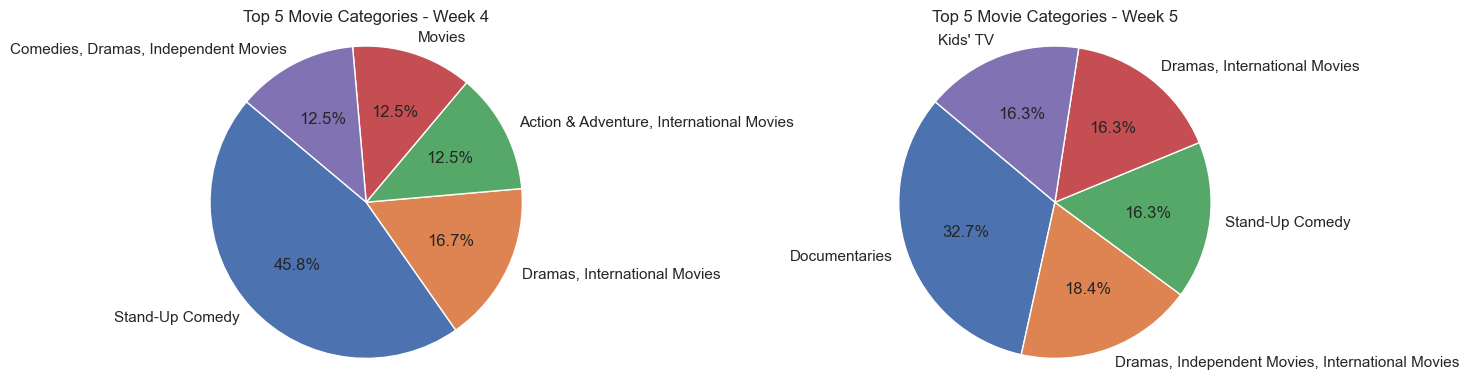

In [70]:
# Filter data for week 4 and week 5
week_4_data = merged_df[merged_df['week'] == 4]
week_5_data = merged_df[merged_df['week'] == 5]

# Calculate top 5 movie categories for week 4 and week 5
top_categories_week_4 = week_4_data['listed_in'].value_counts().head(5)
top_categories_week_5 = week_5_data['listed_in'].value_counts().head(5)

# Plotting for week 4
plt.figure(figsize=(14, 4))  # Increase the width of the figure
plt.subplot(1, 2, 1)
plt.pie(top_categories_week_4, labels=top_categories_week_4.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Movie Categories - Week 4')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Plotting for week 5
plt.subplot(1, 2, 2)
plt.pie(top_categories_week_5, labels=top_categories_week_5.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Movie Categories - Week 5')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.tight_layout(w_pad=6)  # Adjust the horizontal spacing between subplots
plt.show()




In [74]:
pip install geopandas


Note: you may need to restart the kernel to use updated packages.


In [76]:
# Group by country and sum up the number of viewers
total_viewers_by_country = df.groupby('country')['show_id'].sum().reset_index()




In [83]:
import geopandas as gpd

# Load the shapefile
world = gpd.read_file("ne_10m_admin_0_countries.shp")





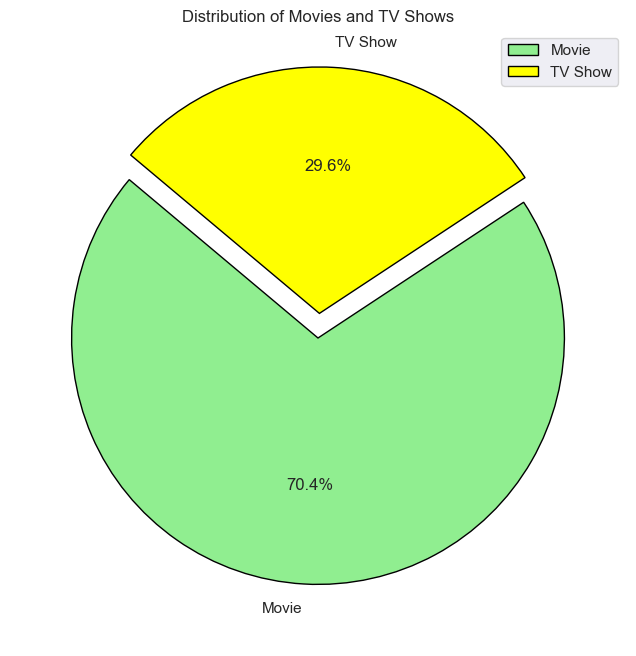

type
Movie      6131
TV Show    2578
Name: count, dtype: int64


In [88]:

type_counts = merged_df['type'].value_counts()

# Plotting the distribution using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140,explode = [0, 0.1], colors=['lightgreen', 'yellow'], wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Movies and TV Shows')
plt.legend()
plt.show()

# Display the counts
print(type_counts)

<Figure size 1200x600 with 0 Axes>

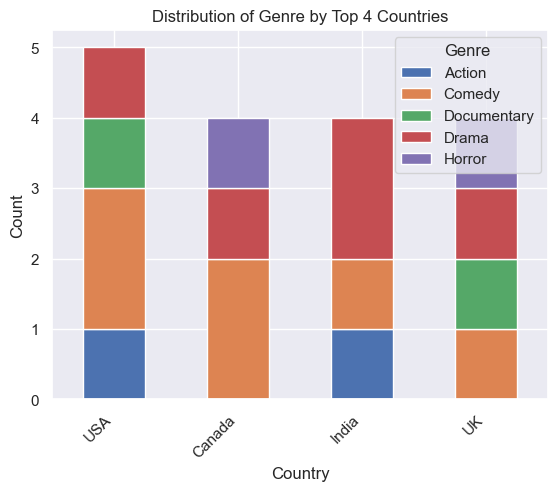

In [104]:
# Sample data creation
data = pd.DataFrame({
    'country': ['USA, Canada', 'USA', 'India, USA', 'UK', 'India', 'Canada, UK', 'USA, UK', 'India'],
    'genre': ['Drama, Comedy', 'Action', 'Comedy', 'Drama', 'Action, Drama', 'Horror, Comedy', 'Documentary', 'Drama']
})

# Split the 'country' column and stack it
countries = data['country'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).to_frame('country')

# Split the 'genre' column and stack it
genres = data['genre'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).to_frame('genre')

# Join the expanded countries and genres back to the main dataframe
expanded_data = countries.join(genres)

# Group by country and genre, then count occurrences
country_genre_counts = expanded_data.groupby(['country', 'genre']).size().unstack(fill_value=0)

# Aggregate counts across all genres to find the top 10 countries
top_countries = country_genre_counts.sum(axis=1).nlargest(10).index

# Filter data to include only top 10 countries
filtered_data = country_genre_counts.loc[top_countries]

# Sort countries by total counts across all genres
filtered_data['Total'] = filtered_data.sum(axis=1)
filtered_data_sorted = filtered_data.sort_values('Total', ascending=False).drop('Total', axis=1)

# Plot the data
plt.figure(figsize=(12, 6))
filtered_data_sorted.plot(kind='bar', stacked=True)
plt.title('Distribution of Genre by Top 4 Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Genre')
plt.show()


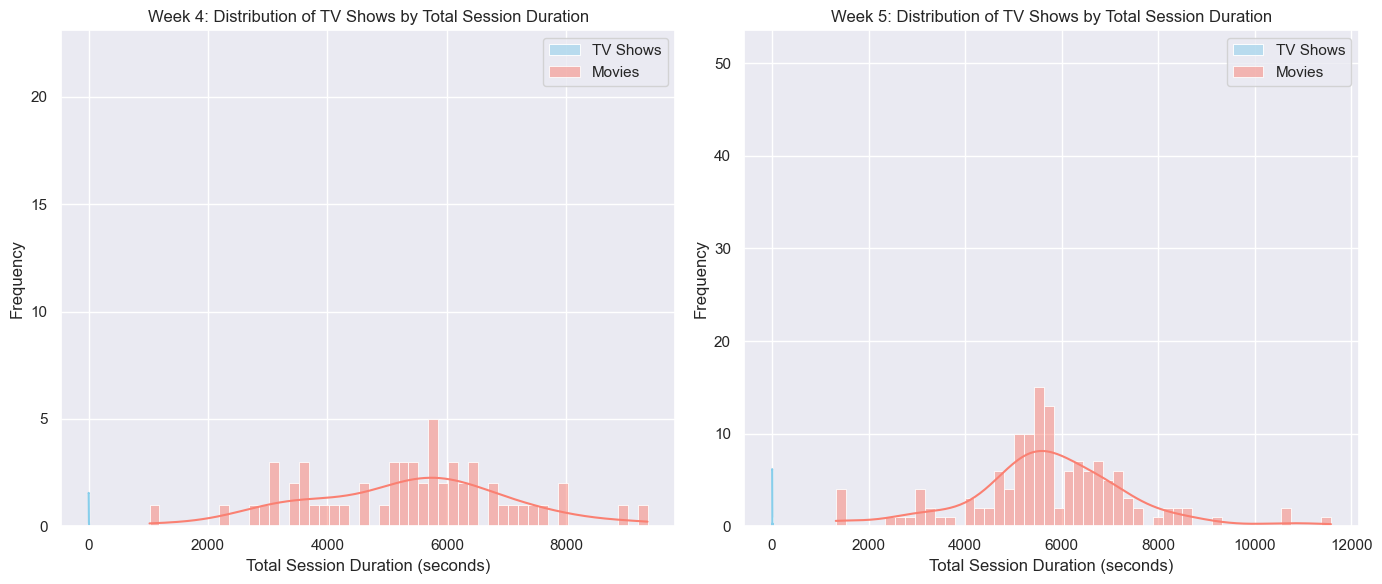

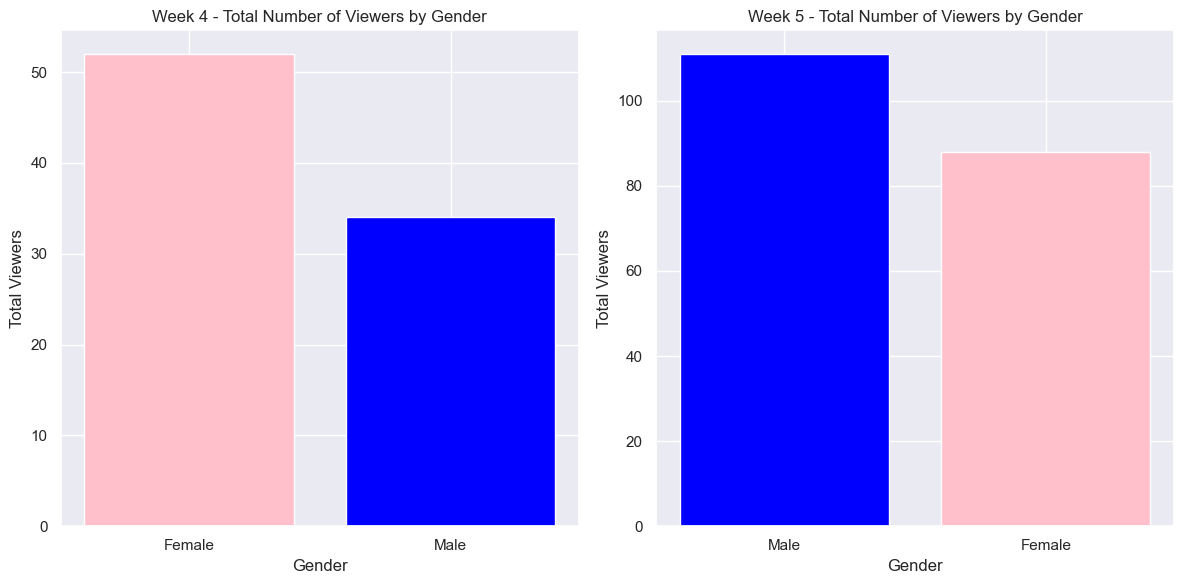

In [111]:
# and it has columns 'gender' and 'week_added'

# Group the data by week and gender and count the number of viewers
gender_counts_week4 = merged_df[merged_df['week'] == 4]['gender'].value_counts()
gender_counts_week5 = merged_df[merged_df['week'] == 5]['gender'].value_counts()

# Define colors for each gender
colors = {'Male': 'blue', 'Female': 'pink', 'Other': 'gray'}  # Adjust colors as needed

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Week 4 subplot
axes[0].bar(gender_counts_week4.index, gender_counts_week4.values, color=[colors.get(gender, 'black') for gender in gender_counts_week4.index])
axes[0].set_title('Week 4 - Total Number of Viewers by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Total Viewers')

# Week 5 subplot
axes[1].bar(gender_counts_week5.index, gender_counts_week5.values, color=[colors.get(gender, 'black') for gender in gender_counts_week5.index])
axes[1].set_title('Week 5 - Total Number of Viewers by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Total Viewers')

plt.tight_layout()
plt.show()



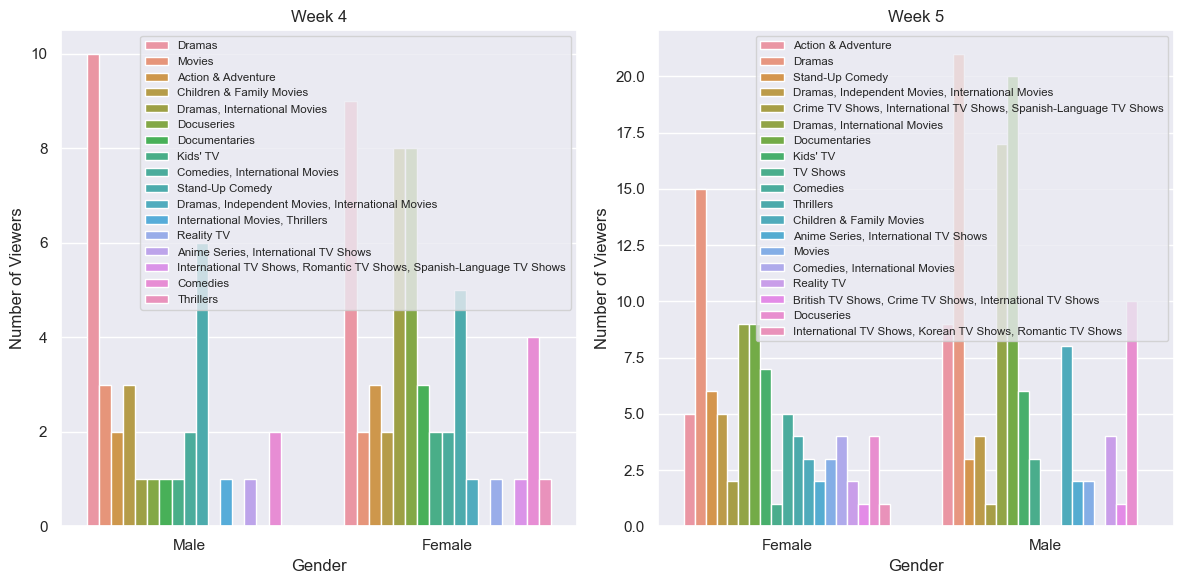

In [118]:

# Plot the bar chart with hue based on top genre
plt.figure(figsize=(12, 6))

# Plot for week 4
plt.subplot(1, 2, 1)
sns.countplot(data=merged_df[merged_df['week'] == 4], x='gender', hue='top_genre')
plt.title('Week 4')
plt.xlabel('Gender')
plt.ylabel('Number of Viewers')
plt.legend(fontsize='x-small')

# Plot for week 5
plt.subplot(1, 2, 2)
sns.countplot(data=merged_df[merged_df['week_adde'] == 5], x='gender', hue='top_genre')
plt.title('Week 5')
plt.xlabel('Gender')
plt.ylabel('Number of Viewers')
plt.legend(fontsize='x-small')

plt.tight_layout()
plt.show()


In [120]:
# Create age categories based on the age column
merged_df['age_category'] = pd.cut(merged_df['age'], bins=[0, 12, 18, 34, 50, float('inf')],
                                   labels=['1-12', '12-18', '18-34', '34-50', '50+'])

# Group the data by age category and genre to get the count of viewers for each genre in each age category
genre_by_age = merged_df.groupby(['age_category', 'listed_in']).size().reset_index(name='viewer_count')

In [121]:
merged_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date,week,duration_seconds,film_title,gender,age,top_genre,age_category
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,38,5400.0,Other,Male,47.0,Documentaries,34-50
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,38,2.0,Other,Female,34.0,Dramas,18-34
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,38,1.0,Other,Female,38.0,Action & Adventure,34-50
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021.0,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24,38,1.0,Other,Male,26.0,Reality TV,18-34
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021.0,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24,38,2.0,Other,Female,54.0,Comedies,50+


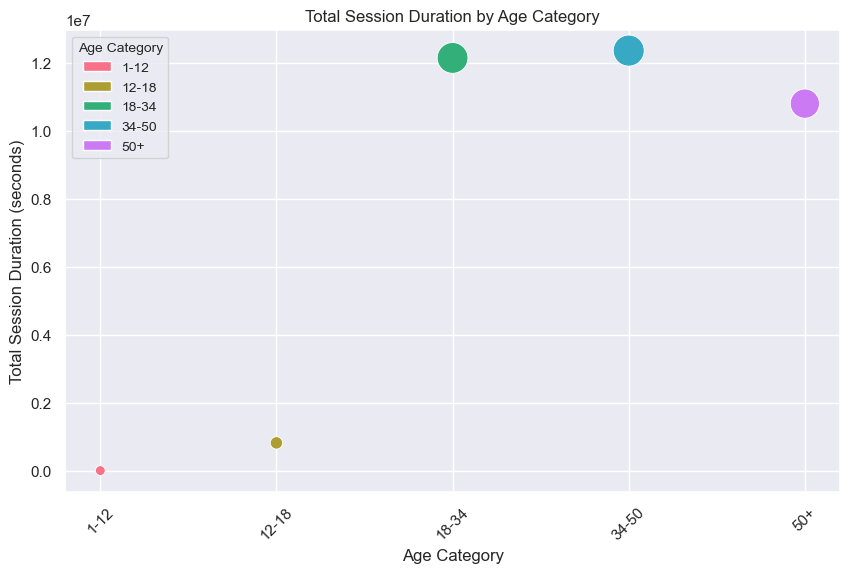

In [130]:

# Group the data by age category and calculate the total session duration for each age category
total_duration_by_age = merged_df.groupby('age_category')['duration_seconds'].sum().reset_index()

# Set the size of the bubbles proportional to the total session duration
sizes = total_duration_by_age['duration_seconds'] / total_duration_by_age['duration_seconds'].max()

# Define a color palette for the age categories
palette = sns.color_palette('husl', n_colors=len(total_duration_by_age))

# Create a dictionary to map age categories to colors
age_category_colors = dict(zip(total_duration_by_age['age_category'], palette))

# Create the bubble plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=total_duration_by_age, x='age_category', y='duration_seconds', size=sizes, sizes=(50, 500), hue='age_category', palette=age_category_colors)
plt.xlabel('Age Category')
plt.ylabel('Total Session Duration (seconds)')
plt.title('Total Session Duration by Age Category')
plt.xticks(rotation=45)
plt.grid(True)

# Create custom legend handles with matching colors
legend_handles = [Patch(facecolor=color, edgecolor='w', label=label) for label, color in age_category_colors.items()]

# Add the custom legend handles to the plot
plt.legend(title='Age Category', handles=legend_handles, fontsize='small', title_fontsize='small')
plt.show()


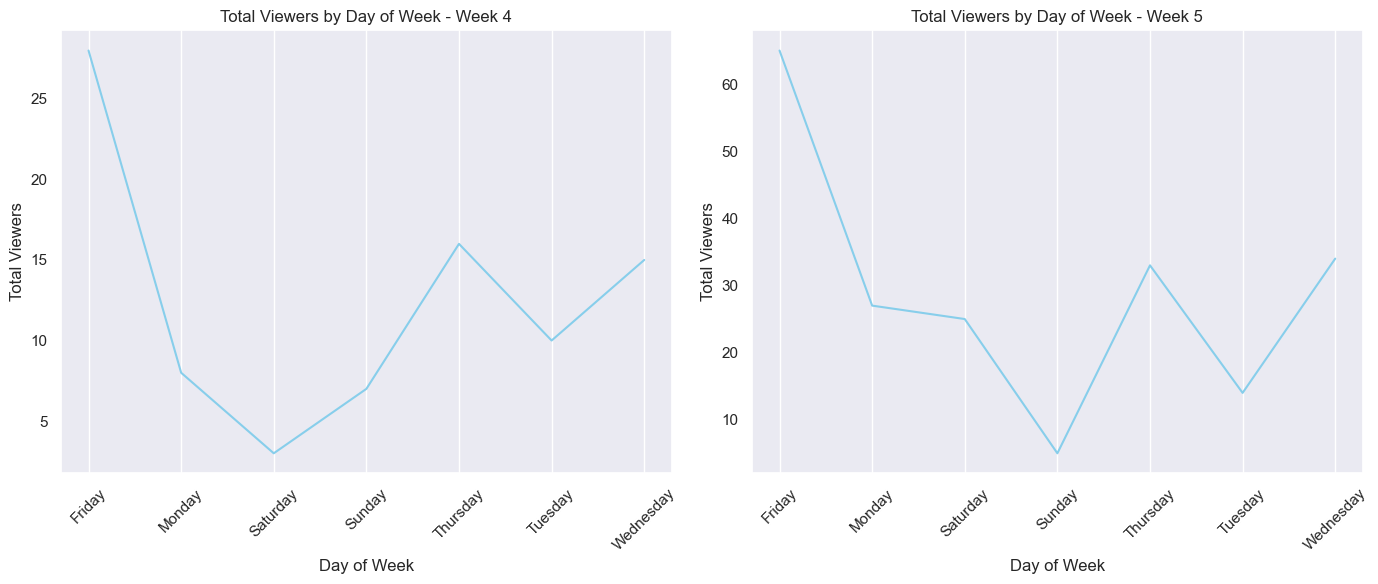

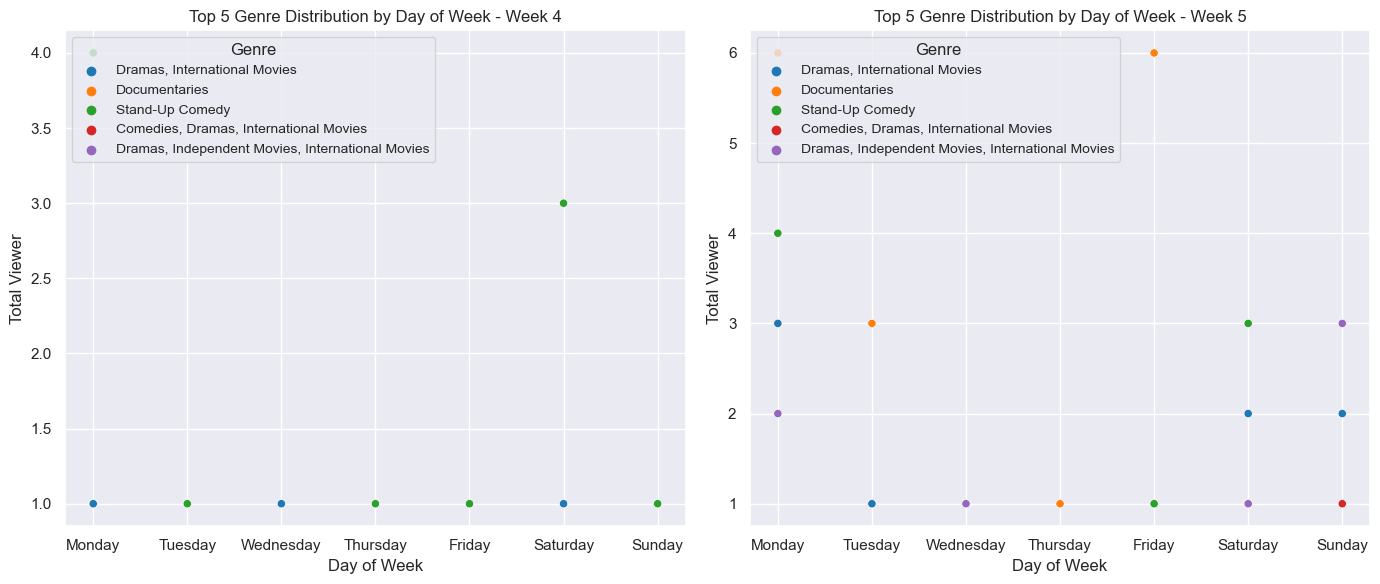